# Ensemble techniques:
### 1. RandomForest

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

## Step 1 : Data Ingestion

In [2]:
import pandas as pd
df = pd.read_csv("train_loan.csv")
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


## Step 2 : Basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [4]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

## Step 3 : Separate X and Y(loan_status)

In [6]:
X = df.drop(columns=["loan_status", "id"])
Y = df[["loan_status"]]

In [7]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [8]:
Y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


## Step 4 : Feature Engineering

In [9]:
X.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [10]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [11]:
cat

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [12]:
con

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [14]:
num_pipe = make_pipeline(
   SimpleImputer(strategy="mean"),
   StandardScaler()
)

In [15]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
)

In [16]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform="pandas")

In [17]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [18]:
X_pre = pre.fit_transform(X)
X_pre

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,1.068949,1.475156,0.075506,2.836651,1.737297,0.553626,1.039036,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
58641,0.074446,-0.929223,-1.187200,0.140632,0.676227,2.080493,0.542655,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
58642,-0.754307,-0.528494,0.580588,-0.434518,1.753773,-0.100746,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
58643,-0.920057,-0.897587,-0.682117,-0.758041,-0.585854,0.117378,-0.698298,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Step 5  : train_test_split

In [19]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.3, random_state=41)

In [20]:
xtrain.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
19224,1.400450,-0.370311,0.833130,1.219040,1.124381,1.753307,1.783608,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
29873,-0.422806,0.684242,-0.429576,0.859570,-1.337171,0.008316,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52751,-0.588556,-0.106673,0.833130,0.050765,-1.043894,-0.100746,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26833,-1.085808,-0.490741,0.075506,-0.829935,-0.572673,-0.646056,-0.946489,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13052,-0.920057,-0.370311,0.328047,-0.254784,-1.050484,-0.100746,-0.450108,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
ytrain.head()

,loan_status
19224,0
29873,0
52751,0
26833,0
13052,0


In [22]:
xtest.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
5153,-0.588556,-1.182316,-0.682117,-1.027643,1.638440,0.226440,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9152,1.566200,-0.607585,-0.682117,-0.218837,1.638440,0.444564,2.776370,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
33673,-0.091305,-0.370311,1.590753,-0.937775,-1.050484,-0.864180,-0.201917,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33834,1.897701,-0.897587,-1.187200,-0.758041,2.251356,0.117378,1.287227,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3442,-0.091305,-0.865950,-1.187200,-0.991696,2.541338,-0.536994,1.039036,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
ytest.head()

,loan_status
5153,1
9152,1
33673,0
33834,1
3442,1


In [24]:
xtrain.shape

(41051, 22)

In [25]:
xtest.shape

(17594, 22)

## Step 6 : model Building
## Bagging - Multiple decision trees are created parallely
### 1. RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(
    n_estimators=1,
    min_samples_leaf=3, 
    min_samples_split=4,
    criterion="entropy"
)
model1.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', min_samples_leaf=3,
                       min_samples_split=4, n_estimators=1)

In [27]:
model1.score(xtrain, ytrain)

0.9431682541229203

In [28]:
model1.score(xtest, ytest)

0.9200863930885529

* Hyperparameter Tuning

In [34]:
import numpy as np
params1 = {
    "n_estimators" : np.arange(1, 320, 50),
    "max_depth" : np.arange(2, 8, 1),
    "min_samples_leaf" : np.arange(2, 8, 1),
    "min_samples_split" : np.arange(2, 9, 1),
    "criterion" : ["gini", "entropy"]
}

In [49]:
base_model1 = RandomForestClassifier()

from sklearn.model_selection import RandomizedSearchCV

rscv_rf = RandomizedSearchCV(base_model1, params1, cv=5, scoring="f1_macro", n_jobs=-1)

rscv_rf.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8]),
                                        'n_estimators': array([  1,  51, 101, 151, 201, 251, 301])},
                   scoring='f1_macro')

In [50]:
rscv_rf.best_score_

np.float64(0.8662139288909557)

In [51]:
rscv_rf.estimator

RandomForestClassifier()

In [52]:
best_rf = rscv_rf.best_estimator_
best_rf

RandomForestClassifier(max_depth=np.int64(7), min_samples_leaf=np.int64(6),
                       min_samples_split=np.int64(8),
                       n_estimators=np.int64(51))

In [53]:
rscv_rf.best_params_

{'n_estimators': np.int64(51),
 'min_samples_split': np.int64(8),
 'min_samples_leaf': np.int64(6),
 'max_depth': np.int64(7),
 'criterion': 'gini'}

In [54]:
best_rf.score(xtrain, ytrain)

0.9441913717083628

In [55]:
best_rf.score(xtest, ytest)

0.9404910765033534

#### Plot Confusion matrix

In [56]:
ypred_test = best_rf.predict(xtest)
ypred_test[0:5]

array([1, 1, 0, 1, 1])

In [60]:
ytest.head()

,loan_status
5153,1
9152,1
33673,0
33834,1
3442,1


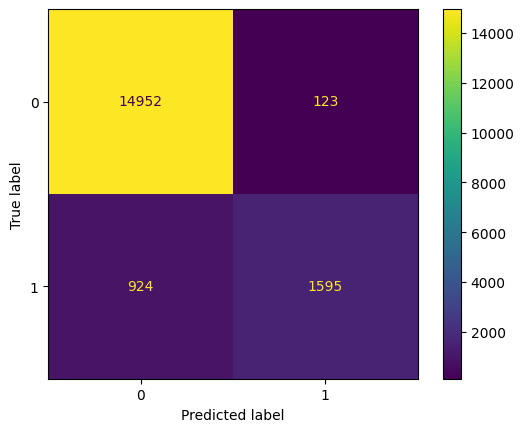

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_rf, xtest, ytest)

In [62]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     15075
           1       0.93      0.63      0.75      2519

    accuracy                           0.94     17594
   macro avg       0.94      0.81      0.86     17594
weighted avg       0.94      0.94      0.94     17594




## Boosting - corrective models are created one by one
### 2. GradientBoostClassifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier(
    n_estimators=100,
    min_samples_leaf=5,
    min_samples_split=5,
)

In [64]:
model2.fit(xtrain, ytrain)

GradientBoostingClassifier(min_samples_leaf=5, min_samples_split=5)

In [65]:
model2.score(xtest, ytest)

0.9436739797658292

In [66]:
model2.score(xtrain, ytrain)

0.9480402426250274

#### Hyperparameter tuning

In [67]:
params2 = {
    "n_estimators" : [50, 100, 150, 200, 250, 300],
    "max_depth" : [2, 3, 4, 5, 6],
    "min_samples_split" : [2, 3, 4, 5, 6, 7, 8],
    "min_samples_leaf" : [2, 3, 4, 5, 6, 7, 8]
}

In [68]:
base_model2 = GradientBoostingClassifier()
rscv_gb = RandomizedSearchCV(base_model2, params2, cv=5, scoring="f1_macro", n_jobs=-1)
rscv_gb.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   scoring='f1_macro')

In [69]:
rscv_gb.best_score_

np.float64(0.8935388470354116)

In [70]:
best_gb = rscv_gb.best_estimator_
best_gb

GradientBoostingClassifier(max_depth=5, min_samples_leaf=6, min_samples_split=7,
                           n_estimators=200)

In [71]:
best_gb.score(xtrain, ytrain)

0.9609753720981219

In [72]:
best_gb.score(xtest, ytest)

0.9499829487325224

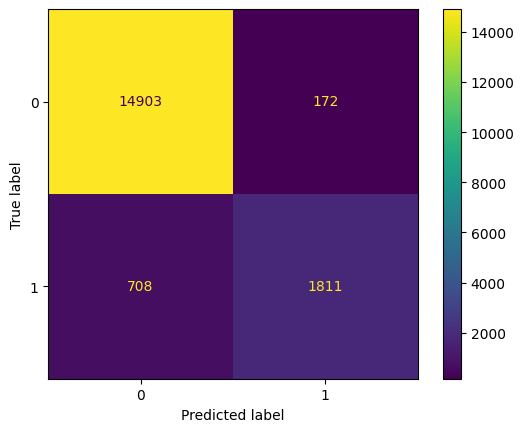

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_gb, xtest, ytest)

In [75]:
best_gb.feature_importances_

array([1.12254302e-02, 7.82122100e-02, 3.92443641e-02, 7.46832398e-03,
       8.32699895e-02, 3.21459195e-01, 2.96384519e-03, 4.08913476e-05,
       1.12682560e-02, 1.62568643e-01, 7.20218486e-03, 2.23315645e-02,
       2.20686896e-02, 1.33511773e-02, 1.00070094e-02, 1.07108635e-03,
       9.56305521e-03, 1.89858567e-01, 5.35415718e-03, 2.89904764e-04,
       1.00873298e-04, 1.08058222e-03])

In [76]:
X_pre.columns

Index(['num__person_age', 'num__person_income', 'num__person_emp_length',
       'num__loan_amnt', 'num__loan_int_rate', 'num__loan_percent_income',
       'num__cb_person_cred_hist_length', 'cat__person_home_ownership_OTHER',
       'cat__person_home_ownership_OWN', 'cat__person_home_ownership_RENT',
       'cat__loan_intent_EDUCATION', 'cat__loan_intent_HOMEIMPROVEMENT',
       'cat__loan_intent_MEDICAL', 'cat__loan_intent_PERSONAL',
       'cat__loan_intent_VENTURE', 'cat__loan_grade_B', 'cat__loan_grade_C',
       'cat__loan_grade_D', 'cat__loan_grade_E', 'cat__loan_grade_F',
       'cat__loan_grade_G', 'cat__cb_person_default_on_file_Y'],
      dtype='object')

In [77]:
ypred_test = best_gb.predict(xtest)
ypred_test[0:5]

array([1, 1, 0, 1, 1])

In [78]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     15075
           1       0.91      0.72      0.80      2519

    accuracy                           0.95     17594
   macro avg       0.93      0.85      0.89     17594
weighted avg       0.95      0.95      0.95     17594



In [79]:
imp = pd.Series(best_gb.feature_importances_, index = X_pre.columns)
imp

num__person_age                     0.011225
num__person_income                  0.078212
num__person_emp_length              0.039244
num__loan_amnt                      0.007468
num__loan_int_rate                  0.083270
num__loan_percent_income            0.321459
num__cb_person_cred_hist_length     0.002964
cat__person_home_ownership_OTHER    0.000041
cat__person_home_ownership_OWN      0.011268
cat__person_home_ownership_RENT     0.162569
cat__loan_intent_EDUCATION          0.007202
cat__loan_intent_HOMEIMPROVEMENT    0.022332
cat__loan_intent_MEDICAL            0.022069
cat__loan_intent_PERSONAL           0.013351
cat__loan_intent_VENTURE            0.010007
cat__loan_grade_B                   0.001071
cat__loan_grade_C                   0.009563
cat__loan_grade_D                   0.189859
cat__loan_grade_E                   0.005354
cat__loan_grade_F                   0.000290
cat__loan_grade_G                   0.000101
cat__cb_person_default_on_file_Y    0.001081
dtype: flo

<Axes: >

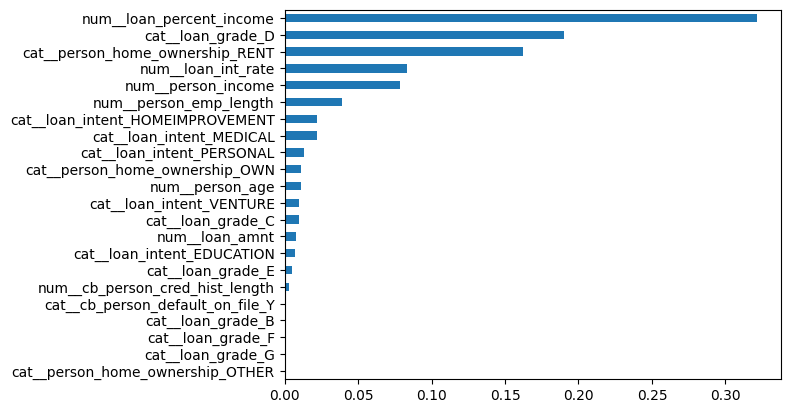

In [82]:
imp.sort_values(ascending=True).plot(kind="barh")